In [1]:
from netCDF4 import Dataset                     # For reading data
#from netCDF4 import num2date, date2num
import matplotlib.pyplot as plt                 # For plotting
# Place figures within document
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 10) # Large figures
dpi=200;

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load data
nDataFiles = 3
file1 = '/Users/todd/Desktop/Dropbox/github/testingFlanders/v3.2/cvmix/WSwPSBF.A.dz10cm/singleColumn.nc'
file2 = '/Users/todd/Desktop/Dropbox/github/testingFlanders/v3.2/cvmix/WSwPSBF.A.dz100cm/singleColumn.nc'
file3 = '/Users/todd/Desktop/Dropbox/github/testingFlanders/v3.2/cvmix/WSwPSBF.A.dz1000cm/singleColumn.nc'
print file1
print file2
print file3
dataL1 = Dataset(file1)
dataL2 = Dataset(file2)
dataL3 = Dataset(file3)
nTime = len(dataL1.dimensions['Time'])
xtime = dataL1.variables['xtime'][:,:]
intTime = range(nTime);
dt = float(1200)/float(86400)
time = numpy.multiply(dt,intTime)
iCell=0

/Users/todd/Desktop/Dropbox/github/testingFlanders/v3.2/cvmix/WSwPSBF.A.dz10cm/singleColumn.nc
/Users/todd/Desktop/Dropbox/github/testingFlanders/v3.2/cvmix/WSwPSBF.A.dz100cm/singleColumn.nc
/Users/todd/Desktop/Dropbox/github/testingFlanders/v3.2/cvmix/WSwPSBF.A.dz1000cm/singleColumn.nc


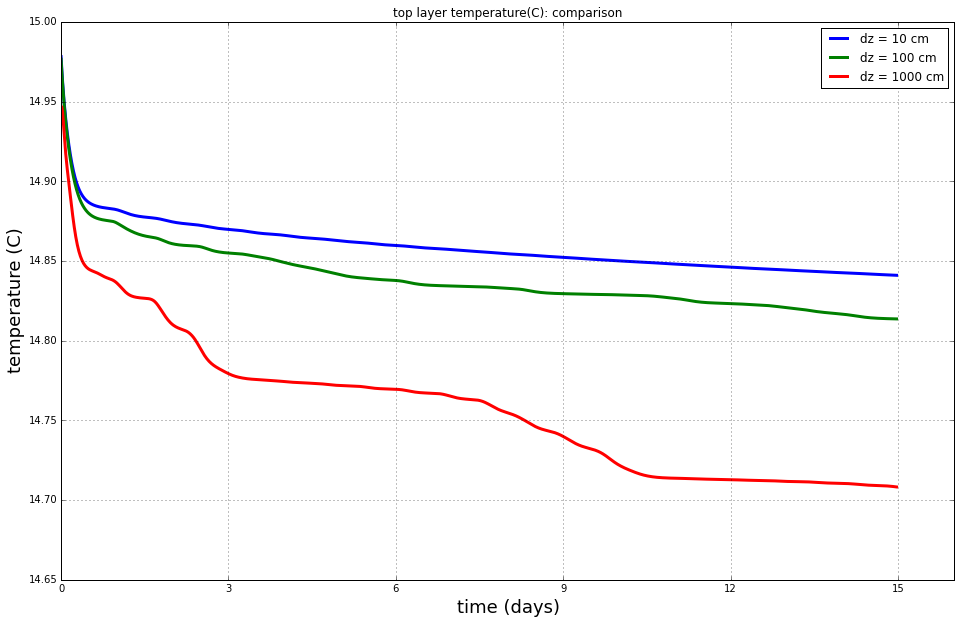

In [3]:
figure(1)
fig, ax = plt.subplots(figsize=(16, 10), dpi=dpi)

temperature1 = dataL1.variables['temperature'][:,iCell,:];
temperature2 = dataL2.variables['temperature'][:,iCell,:];
temperature3 = dataL3.variables['temperature'][:,iCell,:];

plt.plot(time, temperature1[:,0],'-',linewidth=3); 
plt.plot(time, temperature2[:,0],'-',linewidth=3); 
plt.plot(time, temperature3[:,0],'-',linewidth=3); 
plt.ylabel('temperature (C)', fontsize=18); plt.xlabel('time (days)', fontsize=18);
plt.title('top layer temperature(C): comparison  ');
plt.legend(['dz = 10 cm', 'dz = 100 cm', 'dz = 1000 cm'], loc='upper right');
plt.grid();

yticks = [14.65, 14.7, 14.75, 14.8, 14.85, 14.9, 14.95, 15];
xticks = [0, 3, 6, 9, 12, 15];
ax.set_yticks(yticks);
ax.set_xticks(xticks);

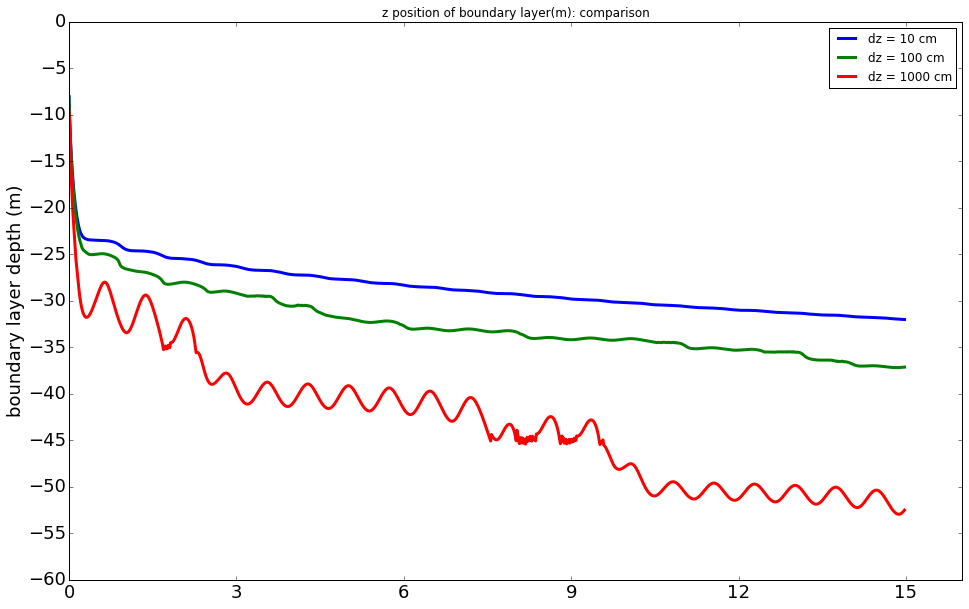

In [4]:
figure(1)
fig, ax = plt.subplots(figsize=(16, 10), dpi=dpi)

boundaryLayerDepth1 = dataL1.variables['boundaryLayerDepth'][:,iCell];
boundaryLayerDepth2 = dataL2.variables['boundaryLayerDepth'][:,iCell];
boundaryLayerDepth3 = dataL3.variables['boundaryLayerDepth'][:,iCell];

plt.grid()
plt.tick_params(axis='both', which='major', labelsize=18)
plt.plot(time, -boundaryLayerDepth1[:],'-',linewidth=3);
plt.plot(time, -boundaryLayerDepth2[:],'-',linewidth=3); 
plt.plot(time, -boundaryLayerDepth3[:],'-',linewidth=3); 
plt.ylabel('boundary layer depth (m)',fontsize=18); plt.title('z position of boundary layer(m): comparison  ');
plt.tick_params(axis='both', which='major', labelsize=18);
plt.legend(['dz = 10 cm', 'dz = 100 cm', 'dz = 1000 cm'], loc='upper right');
plt.grid();

yticks = [-60, -55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0];
xticks = [0, 3, 6, 9, 12, 15];
ax.set_yticks(yticks);
ax.set_xticks(xticks);

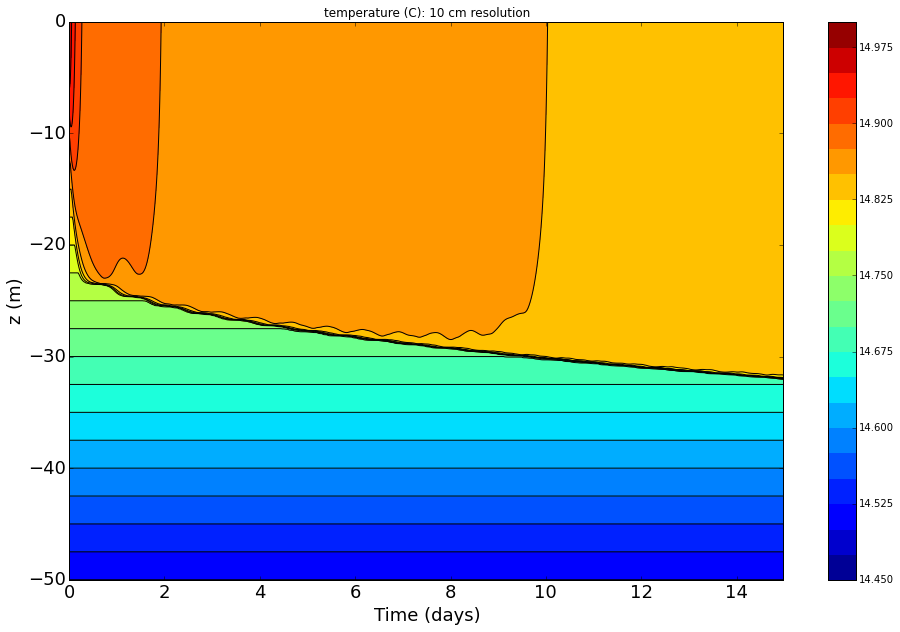

In [ ]:
figure(1)
fig, ax = plt.subplots(figsize=(16, 10), dpi=dpi)

zMid1 = dataL1.variables['zMid'][:,iCell,:]
zMid2 = dataL2.variables['zMid'][:,iCell,:]
zMid3 = dataL3.variables['zMid'][:,iCell,:]

zRef = zMid1[0,:]
plt.contourf(time, zRef, temperature1.T, levels=numpy.arange(14.45,15.00,0.025)); plt.colorbar()
plt.contour(time, zRef, temperature1.T, levels=numpy.arange(14.45,15.00,0.025), colors='k');
plt.ylim((-50,0)); plt.ylabel('z (m)', fontsize=18); plt.xlabel('Time (days)', fontsize=18)
plt.title('temperature (C): 10 cm resolution  ')
plt.tick_params(axis='both', which='major', labelsize=18)

In [ ]:
u = dataL1.variables['velocityZonal'][:,iCell,:]
v = dataL1.variables['velocityMeridional'][:,iCell,:]
plt.subplot(2,1,1); plt.contourf(time, zRef, u.T, levels=numpy.arange(-.10,.11,.01)); plt.colorbar()
plt.subplot(2,1,1); plt.contour(time, zRef, u.T, levels=numpy.arange(-.10,.11,.02), colors='k')
plt.ylim((-50,0)); plt.ylabel('z (m)', fontsize=18); plt.xlabel('Time (days)', fontsize=18);
plt.title('u (m/s): 10 cm resolution  ')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.subplot(2,1,2); plt.contourf(time, zRef, v.T, levels=numpy.arange(-.10,.11,.01)); plt.colorbar()
plt.subplot(2,1,2); plt.contour(time, zRef, v.T, levels=numpy.arange(-.10,.11,.02), colors='k')
plt.ylim((-50,0)); plt.ylabel('z (m)', fontsize=18); plt.xlabel('Time (days)', fontsize=18);
plt.title('v (m/s): 10 cm resolution')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tight_layout(pad=2.0)

In [ ]:
zTop = dataL1.variables['zTop'][:,iCell,:]
bottomDepth = dataL1.variables['bottomDepth'][:]
nVertLevels = len(dataL1.dimensions['nVertLevels'])
Kt = dataL1.variables['vertDiffTopOfCell'][:,iCell,0:nVertLevels]
Ku = dataL1.variables['vertViscTopOfCell'][:,iCell,0:nVertLevels]
zTopRef = zTop[0,:]
print nVertLevels
print Kt.shape
plt.subplot(2,1,1); plt.contourf(time, zTopRef, Kt.T, levels=numpy.arange(0,.02,.001)); plt.colorbar()
plt.subplot(2,1,1); plt.contour(time, zTopRef, Kt.T, levels=numpy.arange(0,.02,.001), colors='w')
plt.ylim((-50,0)); plt.ylabel('z (m)',fontsize=18); plt.xlabel('Time (days)',fontsize=18)
plt.title(r'$\kappa_\theta (m^2/s)$: 10 cm resolution')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.subplot(2,1,2); plt.contourf(time, zTopRef, Ku.T, levels=numpy.arange(0,.02,.001)); plt.colorbar()
plt.subplot(2,1,2); plt.contour(time, zTopRef, Ku.T, levels=numpy.arange(0,.02,.001), colors='w')
plt.ylim((-50,0)); plt.ylabel('z (m)',fontsize=18); plt.xlabel('Time (days)',fontsize=18)
plt.title(r'$\kappa_u (m^2/s)$: 10 cm resolution')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tight_layout(pad=2.0)

In [ ]:
plt.contourf(time, zRef, temperature1.T, levels=numpy.arange(11.,15.1,.1) ); plt.colorbar()
plt.ylabel('z (m)',fontsize=18); plt.xlabel('Time (days)',fontsize=18)
plt.title(r'$\theta$ ($\degree$C):  10 cm resolution');
plt.tick_params(axis='both', which='major', labelsize=18)